python 3.10, 
Tesorflow, Keras 2.10
numpy 1.23.1

# PART1. DNN 실습

###필요한 라이브러리 호출
- import를 이용하여 library 호출

In [16]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Dataset 생성
- Train, Test dataset 불러오기

In [17]:
from keras import datasets
from keras.utils import np_utils

# 오프라인시 파일 필요 : 사용자/.keras/datasets/mnist.npz 
(X_train,y_train), (X_test,y_test) = datasets.mnist.load_data()

- One-Hot Encoding 처리


In [3]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

- Data pre-processing

In [4]:
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

X_train = X_train / 255.0
X_test = X_test / 255.0

### 데이터 입력
- MNIST  dataset 가져오기

In [5]:
mnist = tf.keras.datasets.mnist

### 기본 파라미터 설정
- 노드 수 설정하기

In [6]:
input_node = 784
hidden_node = [100,50]
output_node = 10

### DNN 모델 구현
- DNN 모델링

In [7]:
model = Sequential()

model.add(Dense(hidden_node[0], input_dim=input_node, activation = 'relu', name='Hidden1'))
model.add(Dense(hidden_node[1], activation = 'relu', name='Hidden2'))
model.add(Dense(output_node, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 100)               78500     
                                                                 
 Hidden2 (Dense)             (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


### 분류 DNN 학습 및 성능평가
- 데이터 학습 및 성능 평가

In [8]:
model.fit(X_train,y_train, epochs=20, batch_size= 100, validation_split = 0.3)
result = model.evaluate(X_test,y_test)
print('Test Loss and Accuracy :', result)

Epoch 1/20
420/420 [==============================] - 4s 5ms/step - loss: 0.4025 - accuracy: 0.8860 - val_loss: 0.1977 - val_accuracy: 0.9424
Epoch 2/20
420/420 [==============================] - 2s 4ms/step - loss: 0.1583 - accuracy: 0.9535 - val_loss: 0.1509 - val_accuracy: 0.9578
Epoch 3/20
420/420 [==============================] - 2s 4ms/step - loss: 0.1116 - accuracy: 0.9679 - val_loss: 0.1300 - val_accuracy: 0.9618
Epoch 4/20
420/420 [==============================] - 2s 4ms/step - loss: 0.0873 - accuracy: 0.9744 - val_loss: 0.1225 - val_accuracy: 0.9640
Epoch 5/20
420/420 [==============================] - 2s 4ms/step - loss: 0.0697 - accuracy: 0.9796 - val_loss: 0.1316 - val_accuracy: 0.9611
Epoch 6/20
420/420 [==============================] - 2s 4ms/step - loss: 0.0560 - accuracy: 0.9834 - val_loss: 0.1144 - val_accuracy: 0.9671
Epoch 7/20
420/420 [==============================] - 2s 4ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.1181 - val_accuracy: 0.9669
Epoch 

# PART2. CNN 실습

### 필요한 라이브러리 호출
- import를 이용하여 필요한 library 호출

In [9]:
import tensorflow as tf
import numpy as np

### Dataset 생성
- Tensorflow에서 MNIST 데이터 다운

In [10]:
# 오프라인시 파일 필요 : 사용자/.keras/datasets/mnist.npz 
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

- Data pre-processing

In [12]:
tf.random.set_seed(1234)

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

- One-Hot encoding 처리

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

### CNN 모델 구현
- CNN 모델링

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28,28,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

### CNN 모델 구현
- 모델 컴파일

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                  

### 모델 평가
- 모델 훈련 및 평가

In [17]:
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test,y_test))

result = model.evaluate(x_test,y_test)
print("Accuracy(%):", result)

Epoch 1/10
600/600 [==============================] - 48s 70ms/step - loss: 0.1907 - accuracy: 0.9402 - val_loss: 0.0502 - val_accuracy: 0.9854
Epoch 2/10
600/600 [==============================] - 45s 75ms/step - loss: 0.0566 - accuracy: 0.9839 - val_loss: 0.0406 - val_accuracy: 0.9874
Epoch 3/10
600/600 [==============================] - 47s 78ms/step - loss: 0.0402 - accuracy: 0.9893 - val_loss: 0.0226 - val_accuracy: 0.9935
Epoch 4/10
600/600 [==============================] - 46s 77ms/step - loss: 0.0343 - accuracy: 0.9904 - val_loss: 0.0193 - val_accuracy: 0.9939
Epoch 5/10
600/600 [==============================] - 46s 77ms/step - loss: 0.0256 - accuracy: 0.9926 - val_loss: 0.0225 - val_accuracy: 0.9930
Epoch 6/10
600/600 [==============================] - 47s 78ms/step - loss: 0.0241 - accuracy: 0.9931 - val_loss: 0.0160 - val_accuracy: 0.9954
Epoch 7/10
600/600 [==============================] - 47s 78ms/step - loss: 0.0206 - accuracy: 0.9944 - val_loss: 0.0186 - val_accuracy:

In [18]:
print("Accuracy(%):", result[1])

Accuracy(%): 0.9909999966621399


# 실습 예제

In [1]:
import tensorflow as tf
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# 오프라인시 파일 필요 : 사용자/.keras/datasets/cifar-10-batches-py.tar.gz 
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [24]:
tf.random.set_seed(1234)

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((50000,32,32,3))
x_test = x_test.reshape((10000,32,32,3))

In [25]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, input_shape=x_train.shape[1:], padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1048640   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                      

In [28]:
model.fit(x_train, y_train, batch_size=100, epochs=35, validation_data=(x_test,y_test))

loss,result = model.evaluate(x_test,y_test)
print('Loss: {}, Acc: {}'.format(loss,result))

Epoch 1/35
500/500 [==============================] - 16s 29ms/step - loss: 1.5120 - accuracy: 0.4551 - val_loss: 1.1965 - val_accuracy: 0.5827
Epoch 2/35
500/500 [==============================] - 14s 28ms/step - loss: 1.1483 - accuracy: 0.5902 - val_loss: 1.0245 - val_accuracy: 0.6405
Epoch 3/35
500/500 [==============================] - 14s 28ms/step - loss: 1.0115 - accuracy: 0.6414 - val_loss: 0.9561 - val_accuracy: 0.6635
Epoch 4/35
500/500 [==============================] - 14s 28ms/step - loss: 0.9179 - accuracy: 0.6734 - val_loss: 0.9210 - val_accuracy: 0.6797
Epoch 5/35
500/500 [==============================] - 14s 29ms/step - loss: 0.8432 - accuracy: 0.6989 - val_loss: 0.8989 - val_accuracy: 0.6838
Epoch 6/35
500/500 [==============================] - 15s 30ms/step - loss: 0.7750 - accuracy: 0.7232 - val_loss: 0.8970 - val_accuracy: 0.6886
Epoch 7/35
500/500 [==============================] - 15s 29ms/step - loss: 0.7071 - accuracy: 0.7453 - val_loss: 0.8927 - val_accuracy:

# PART3. RNN 실습

In [30]:
import numpy as np
import tensorflow as tf

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
# x_data = [[0, 1, 0, 2, 3, 3]]  # hihell
y_data = [[1, 0, 2, 3, 3, 4]]  # ihello

num_classes = 5
input_dim = 5  # one-hot size, same as hidden_size to directly predict one-hot
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
  [0, 1, 0, 0, 0],    # i 1
  [1, 0, 0, 0, 0],    # h 0
  [0, 0, 1, 0, 0],    # e 2
  [0, 0, 0, 1, 0],    # l 3
  [0, 0, 0, 1, 0]]],  # l 3
  dtype=np.float32)

In [31]:
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
print(x_one_hot.shape)

tf.model = tf.keras.Sequential()
# make cell and add it to RNN layer
# input_shape = (1,6,5) => number of sequence (batch), length of sequence, 
# size of input dim
cell = tf.keras.layers.LSTMCell(units=num_classes, input_shape=(sequence_length, input_dim))
tf.model.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))

# single LSTM layer can be used as well instead of creating LSTMCell
# tf.model.add(tf.keras.layers.LSTM(units=num_classes, input_shape=(sequence_length, 
# input_dim), return_sequences=True))


(1, 6, 5)


In [32]:
# fully connected layer
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
  metrics=['accuracy'])

# train
tf.model.fit(x_one_hot, y_one_hot, epochs=50)
tf.model.summary()

predictions = tf.model.predict(x_one_hot)
for i, prediction in enumerate(predictions):
  print(prediction)
  # print char using argmax, dict
  result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
  print("\tPrediction str: ", ''.join(result_str))


Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.6461 - accuracy: 0.1667
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 1.5512 - accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 1.4816 - accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 1.4021 - accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 1.3017 - accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 1.1839 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 1.0575 - accuracy: 0.6667
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.9368 - accuracy: 0.6667
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 0.8342 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 21ms/step - loss: 0.7424 - accuracy: 1.0000
Epoch 11/50
1/1 [==============

# PART4. GAN 실습

## Vanilla GAN 예제

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 오프라인시 파일 필요 : 사용자/.keras/datasets/mnist.npz 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

generator에서 `tanh`를 activation으로 활용

`tanh`를 활용하면 output이 -1 ~ 1 사이기 때문에 **Normalize**를 해줄 때 127.5로 나눈 뒤 1을 차감

In [3]:
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

**min** 값과 **max** 값이 -1 ~ 1사이의 범위를 가져야 함

In [4]:
x_train.min(), x_train.max()

(-1.0, 1.0)

`x_train` 값(28 * 28)을 펼쳐줌

In [5]:
x_train = x_train.reshape(-1, 784)
x_train.shape

(60000, 784)

### Hyperparameters

`NOISE_DIM`을 정의.

NOISE_DIM은 자유롭게 설정할 수 있으며, Generator의 **input**으로 들어감.

In [6]:
# GAN에 입력되는 noise에 대한 dimension
NOISE_DIM = 10

# Adam optimizer 정의, learning_rate = 0.0002, beta_1=0.5
# Vanilla GAN과 DCGAN에서 통상적으로 이렇게 설정해야 학습이 잘됨
adam = Adam(learning_rate=0.0002, beta_1=0.5)

### Generator

In [7]:
generator = Sequential([
    Dense(256, input_dim=NOISE_DIM), 
    LeakyReLU(0.2), 
    Dense(512), 
    LeakyReLU(0.2), 
    Dense(1024), 
    LeakyReLU(0.2), 
    Dense(28*28, activation='tanh'),
])
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

### Discriminator

In [8]:
discriminator = Sequential([
    Dense(1024, input_shape=(784,), kernel_initializer=RandomNormal(stddev=0.02)),
    LeakyReLU(0.2), 
    Dropout(0.3), 
    Dense(512),
    LeakyReLU(0.2), 
    Dropout(0.3), 
    Dense(256),
    LeakyReLU(0.2), 
    Dropout(0.3), 
    Dense(1, activation='sigmoid')
])
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

반드시 Dicriminator를 compile 해주어야 함.

In [9]:
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

### GAN

Generator와 Discriminator를 연결

In [10]:
# Discriminator는 학습을 하지 않도록 하며, GAN모델에서는 Generator만 학습.
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
x = generator(inputs=gan_input)
output = discriminator(x)

GAN 모델을 정의

In [11]:
gan = Model(gan_input, output)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 sequential (Sequential)     (None, 784)               1463312   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,923,537
Trainable params: 1,463,312
Non-trainable params: 1,460,225
_________________________________________________________________


### Compile

In [12]:
gan.compile(loss='binary_crossentropy', optimizer=adam)

### Batch

이미지 batch를 생성. MNIST 이미지 batch가 차례대로 생성됨.

In [13]:
def get_batches(data, batch_size):
    batches = []
    for i in range(int(data.shape[0] // batch_size)):
        batch = data[i * batch_size: (i + 1) * batch_size]
        batches.append(batch)
    return np.asarray(batches)

###  시각화를 위한 유틸 함수 정의

In [14]:
def visualize_training(epoch, d_losses, g_losses):
    # 오차에 대한 시각화
    plt.figure(figsize=(8, 4))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generatror Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    print('epoch: {}, Discriminator Loss: {}, Generator Loss: {}'.format(epoch, np.asarray(d_losses).mean(), np.asarray(g_losses).mean()))
    
    #샘플 데이터 생성 후 시각화
    noise = np.random.normal(0, 1, size=(24, NOISE_DIM))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(-1, 28, 28)
    
    plt.figure(figsize=(8, 4))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 6, i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

### 학습

epoch 1 ..........


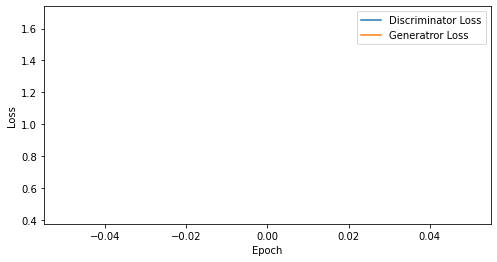

epoch: 1, Discriminator Loss: 0.43672218918800354, Generator Loss: 1.6771572828292847
1/1 [==============================] - 0s 84ms/step


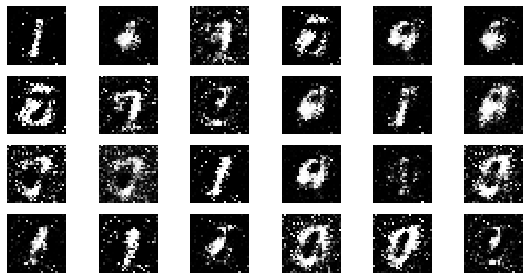

epoch 2 ..........
epoch 3 ..........
epoch 4 ..........
epoch 5 ..........


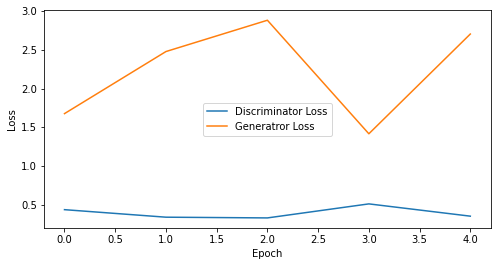

epoch: 5, Discriminator Loss: 0.39411266446113585, Generator Loss: 2.232239317893982
1/1 [==============================] - 0s 28ms/step


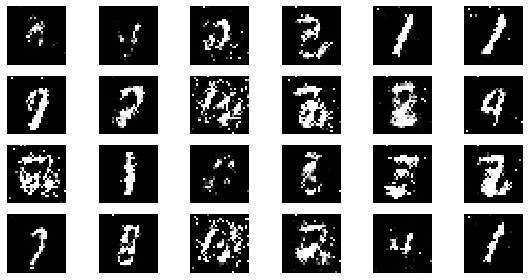

epoch 6 ..........
epoch 7 ..........
epoch 8 ..........
epoch 9 ..........
epoch 10 ..........


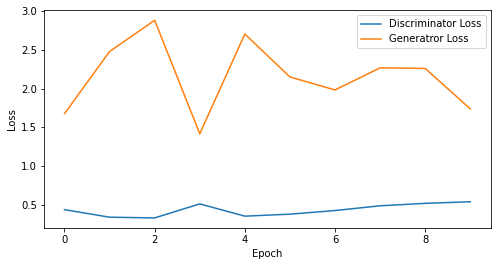

epoch: 10, Discriminator Loss: 0.43187893033027647, Generator Loss: 2.156232225894928
1/1 [==============================] - 0s 25ms/step


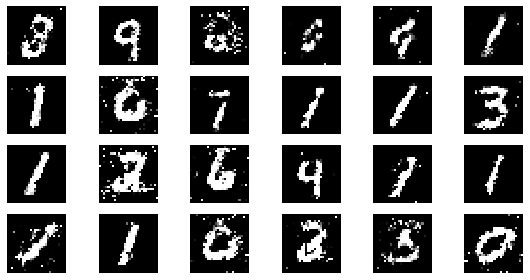

epoch 11 ..........
epoch 12 ..........
epoch 13 ..........
epoch 14 ..........
epoch 15 ..........


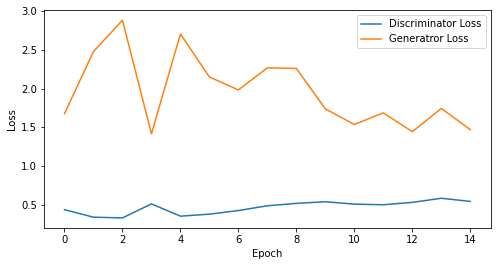

epoch: 15, Discriminator Loss: 0.4656585415204366, Generator Loss: 1.9629421472549438
1/1 [==============================] - 0s 25ms/step


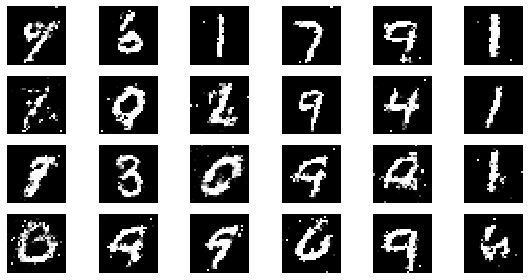

epoch 16 ..........
epoch 17 ..........
epoch 18 ..........
epoch 19 ..........
epoch 20 ..........


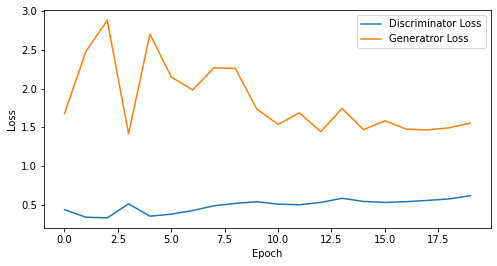

epoch: 20, Discriminator Loss: 0.4901880383491516, Generator Loss: 1.8509985685348511
1/1 [==============================] - 0s 23ms/step


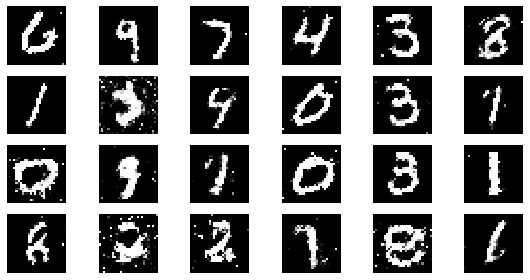

epoch 21 ..........
epoch 22 ..........
epoch 23 ..........
epoch 24 ..........
epoch 25 ..........


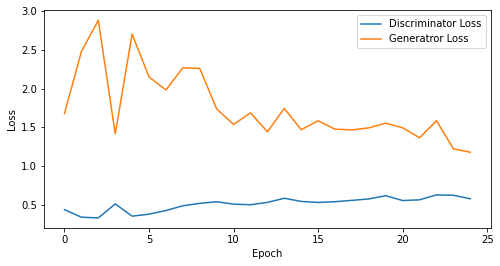

epoch: 25, Discriminator Loss: 0.5100090074539184, Generator Loss: 1.7546018218994142
1/1 [==============================] - 0s 27ms/step


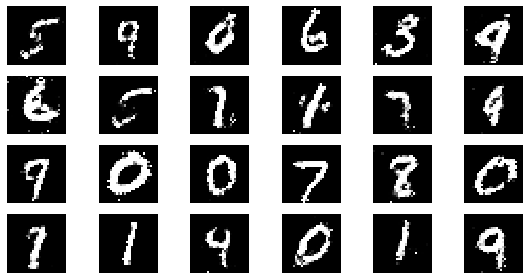

epoch 26 ..........
epoch 27 ..........
epoch 28 ..........
epoch 29 ..........
epoch 30 ..........


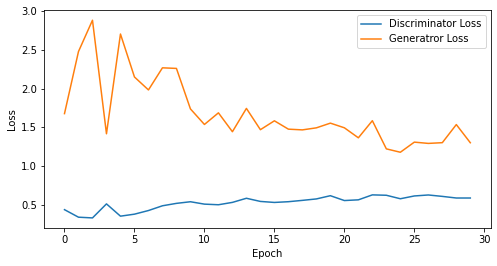

epoch: 30, Discriminator Loss: 0.5257709264755249, Generator Loss: 1.6868377089500428
1/1 [==============================] - 0s 23ms/step


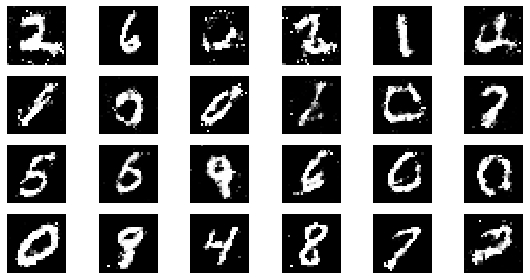

epoch 31 ..........
epoch 32 ..........
epoch 33 ..........
epoch 34 ..........
epoch 35 ..........


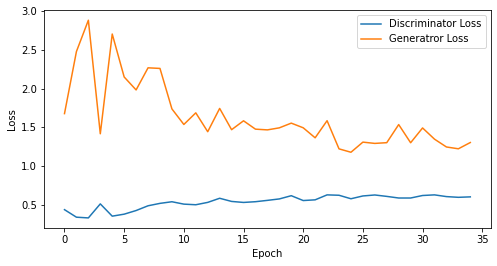

epoch: 35, Discriminator Loss: 0.5378368088177272, Generator Loss: 1.6347954409463066
1/1 [==============================] - 0s 23ms/step


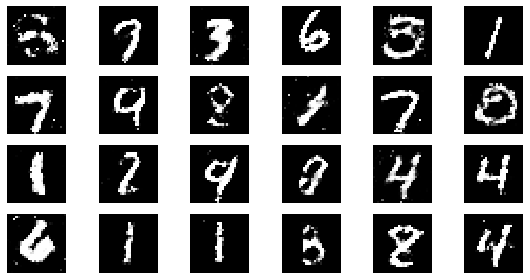

epoch 36 ..........
epoch 37 ..........
epoch 38 ..........
epoch 39 ..........
epoch 40 ..........


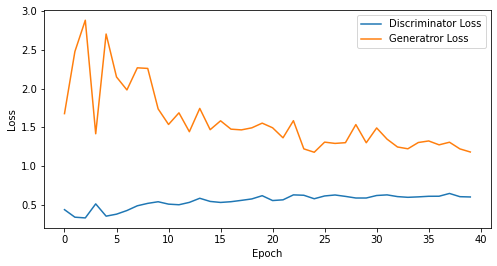

epoch: 40, Discriminator Loss: 0.547387421131134, Generator Loss: 1.5881722658872603
1/1 [==============================] - 0s 26ms/step


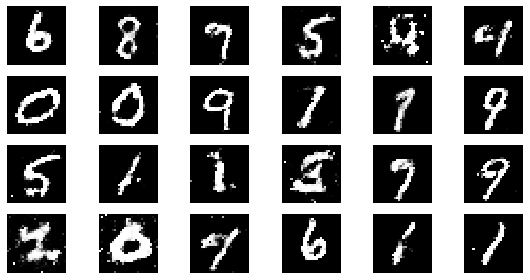

epoch 41 ..........
epoch 42 ..........
epoch 43 ..........
epoch 44 ..........
epoch 45 ..........


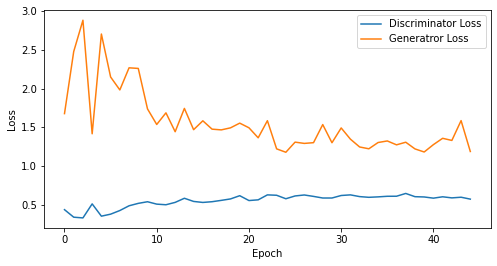

epoch: 45, Discriminator Loss: 0.5520702176623874, Generator Loss: 1.561508470111423
1/1 [==============================] - 0s 25ms/step


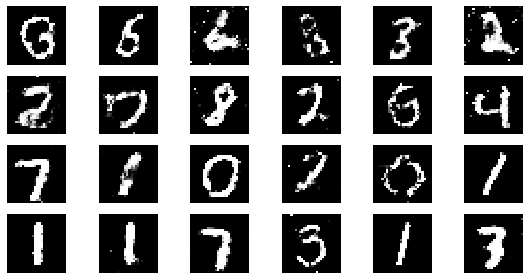

epoch 46 ..........
epoch 47 ..........
epoch 48 ..........
epoch 49 ..........
epoch 50 ..........


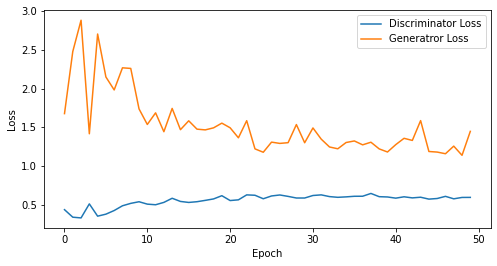

epoch: 50, Discriminator Loss: 0.5559909772872925, Generator Loss: 1.5290294408798217
1/1 [==============================] - 0s 25ms/step


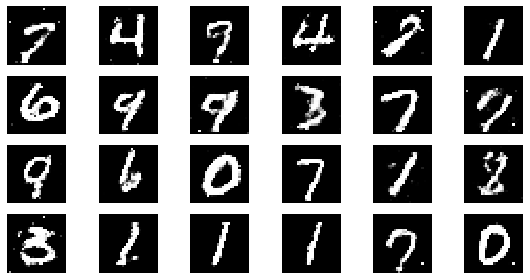

In [15]:
BATCH_SIZE = 128
EPOCHS= 50

# Discriminator와 GAN 모델의 Loss 측정을 위한 list 
d_losses = []
g_losses = []

for epoch in range(1, EPOCHS + 1):
    print(f"epoch {epoch} ..........")
    # 각 배치별 학습
    for real_images in get_batches(x_train, BATCH_SIZE):
        # 랜덤 노이즈 생성
        input_noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, NOISE_DIM])
        
        # 가짜 이미지 데이터 생성
        generated_images = generator.predict(input_noise, verbose = 0)
        
        # GAN에 학습할 X 데이터 정의
        x_dis = np.concatenate([real_images, generated_images])
        
        # GAN에 학습할 Y 데이터 정의
        y_dis = np.zeros(2 * BATCH_SIZE)
        y_dis[:BATCH_SIZE] = 0.9
        
        # Discriminator 훈련
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x_dis, y_dis)

        # GAN 훈련
        noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, NOISE_DIM])
        y_gan = np.ones(BATCH_SIZE)
        
        # Discriminator의 판별 학습을 방지
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gan)
        
    d_losses.append(d_loss)
    g_losses.append(g_loss)

    if epoch == 1 or epoch % 5 == 0:
        visualize_training(epoch, d_losses, g_losses)